#Izhikevich Neuron Model Simulation
Izhikevich's neuron model, is a model developed using dynamical system analysis. Although the model parameters don't have biological interpretations, the model is rather very good at modelling differnet spiking dynamics such as regular spiking, fast spiking, and bursting.

Let's try and model the neuron and see what is that like. Let's import what we need

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import math

Define the Izhikevich model using parameters a,b, c, and d. Also define a handy plotting function

In [47]:
def Izhikevich_neuron(a, b, c, d, fn_input_current, duration=1000):
  #discrete time
  time = [0]
  
  #membrane potential
  v = [c]
  
  #recovery variable
  u = [b*c]

  #time resolution
  dt = 0.001

  I = [fn_input_current(0)] #input current
  
  # value at which the membrane will reset the membrane potential
  reset_voltage = 30
  
  for t in np.arange(dt, duration, step=dt):
    time.append(t)
    v_old = v[-1]
    u_old = u[-1]
    I_old = I[-1]

    I_new = fn_input_current(t)
    I.append(I_new)
    
    dvdt = 0.04 * v_old**2 + 5*v_old + 140 - u_old + I_new
    dudt = a*(b*v_old-u_old)
    
    v_new = v_old + dvdt
    u_new = u_old + dudt
    
    if v_new > reset_voltage:
      v_new = c
      u_new = u_old+d

    v.append(v_new)
    u.append(u_new)
    
  return (time, v, u, I)

def plot_ishkevich(a, b, c, d, duration, fn_input_current):
  t, v, u, I = Izhikevich_neuron(a=a, b=b, c=c, d=d, fn_input_current=fn_input_current, duration=duration)
  
  fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(9, 7), dpi=90, facecolor='w', edgecolor='k')
  axs[0].set_title("Input Current over time")
  axs[0].plot(t, I, color="green")
  axs[0].set_xlabel("time (ms)")
  axs[0].set_ylabel("Voltage (mV)")
  axs[1].plot(t, v)
  axs[1].plot(t, u, color="red")
  axs[1].set_title("Membrane Potential (v) vs Recovery variable (u)")
  axs[1].set_xlabel("time (ms)")
  axs[1].set_ylabel("Voltage (mV)")

Define simulation conditions

In [69]:
duration = 20

def fixed_current(t):
  return 10

def periodic_current(t):
  return math.sin(2*t/10*math.pi)*5

def one_step_current(t):
  if t < duration / 2:
    return 0
  else:
    return 4

This is a bursting neuron

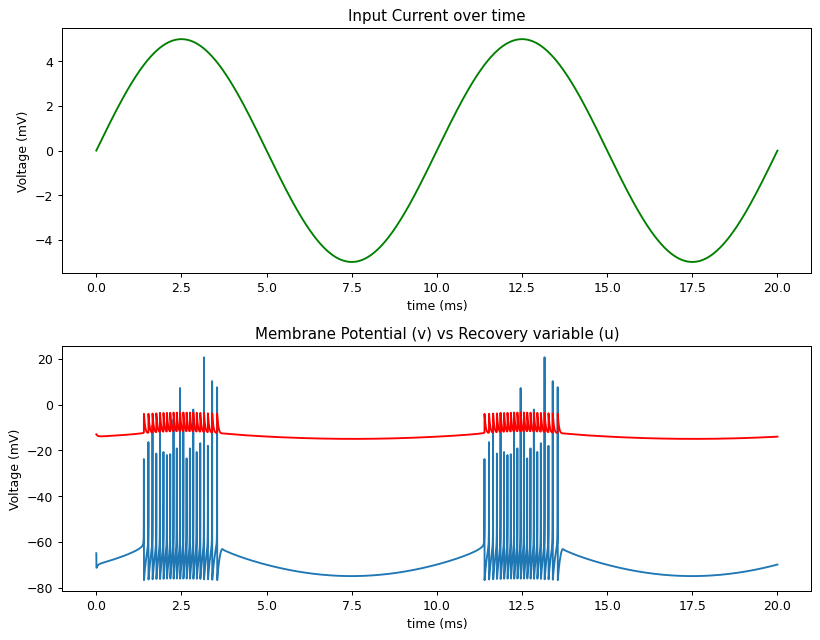

In [98]:
a = 0.02
b = 0.2
c = -65
d = 8
plot_ishkevich(a=a, b=b, c=c, d=d, duration=duration, fn_input_current = periodic_current)